# 3.0-Normalization and Embedding 

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-09"

## Introduction

Normalize data and create embeddings for each time point fraction

In [2]:
timepoint <- "T1"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(tidyverse)
library(grid)
library(gridExtra)
library(ggplot2)
library(scater) 
library(scran)
}))

## Parameters

In [4]:
#here::dr_here(show_reason = TRUE)
source(here::here("SCGRES_83_84/sc_analysis/misc/paths.R"))

"{clust}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{clust}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [5]:
seurat_obj <- readRDS(here::here(glue::glue("{qc}/{robj_dir}/clean_combined_object_{timepoint}.rds")))

In [6]:
head(seurat_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_org,timepoint,replicate,sample_id,pct_mt,percent.ribo,doublet_score,doublet_pred
,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
T1_1_AAACCTGAGAAGGCCT-1,SCGRES_83_84,8579,3076,OS0007_1,T1,1,T1_1,1.1539807,8.777247,0.01767429,FALSE
T1_1_AAACCTGAGAATGTGT-1,SCGRES_83_84,12229,2841,OS0007_1,T1,1,T1_1,0.9567422,5.797694,0.33299544,FALSE
T1_1_AAACCTGAGAGGTACC-1,SCGRES_83_84,3734,386,OS0007_1,T1,1,T1_1,0.2142475,0.401714,0.05550790,FALSE
T1_1_AAACCTGAGATCCCAT-1,SCGRES_83_84,1738,145,OS0007_1,T1,1,T1_1,0.1726122,2.761795,0.00800000,FALSE
T1_1_AAACCTGAGATCCCGC-1,SCGRES_83_84,2813,1518,OS0007_1,T1,1,T1_1,3.1283327,14.041948,0.03388889,FALSE
T1_1_AAACCTGAGATGGCGT-1,SCGRES_83_84,1991,1069,OS0007_1,T1,1,T1_1,1.7579106,8.689101,0.01934362,FALSE


## Normalization and linear dimensional reduction

In [7]:
seurat_obj <- NormalizeData(
  seurat_obj,
  normalization.method = "LogNormalize",
  scale.factor = 1e4
)

In [8]:
sce <- as.SingleCellExperiment(seurat_obj)
sce

class: SingleCellExperiment 
dim: 29327 54831 
metadata(0):
assays(2): counts logcounts
rownames(29327): MIR1302-2HG AL627309.1 ... AC010086.3 AC004556.3
rowData names(0):
colnames(54831): T1_1_AAACCTGAGAAGGCCT-1 T1_1_AAACCTGAGAATGTGT-1 ...
  T1_2_TTTGTCATCTGAAAGA-1 T1_2_TTTGTCATCTTTAGGG-1
colData names(12): orig.ident nCount_RNA ... doublet_pred ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


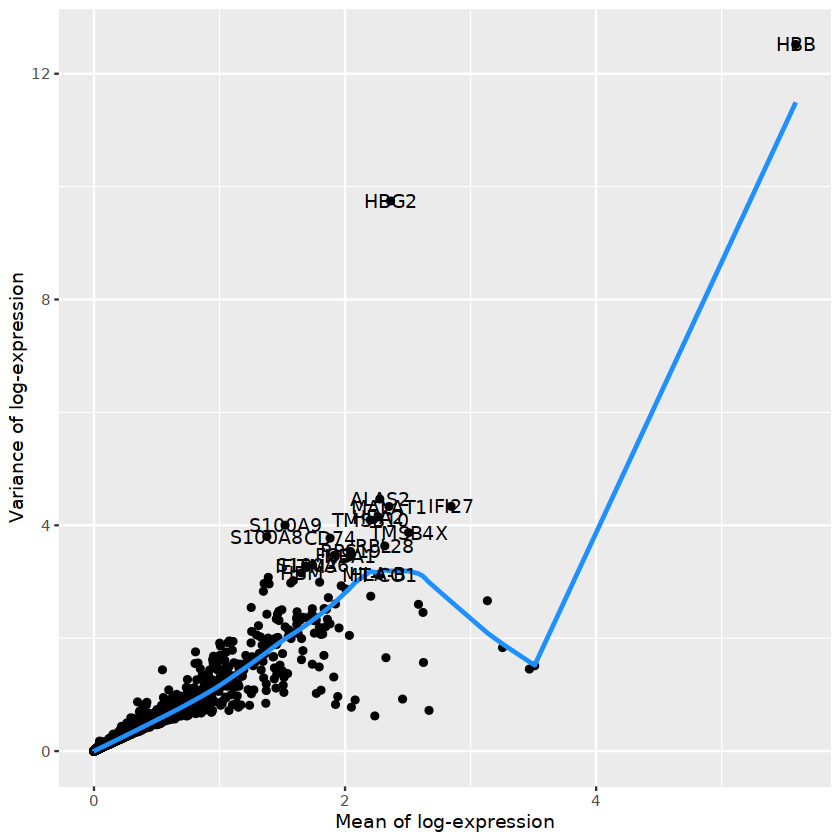

In [9]:
gene_var <- modelGeneVar(sce)

tops <- gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

gene_var %>% 
  as.data.frame() %>% 
  ggplot(aes(mean, total)) +
  geom_point() +
  geom_line(aes(y = tech), colour = "dodgerblue", size = 1) +
  labs(x = "Mean of log-expression", y = "Variance of log-expression")+
  geom_text(data=tops, aes(mean,total,label=rownames(tops)))

In [10]:
gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

,mean,total,tech,bio,p.value,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HBB,5.590364,12.518278,11.493368,1.02490949,3.051903e-01,7.872045e-01
HBG2,2.362687,9.745687,3.190347,6.55534015,3.947597e-32,6.738547e-29
ALAS2,2.276859,4.465593,3.173259,1.29233472,9.981922e-03,2.876518e-01
IFI27,2.844506,4.335707,2.648019,1.68768729,1.354284e-04,1.059299e-02
MALAT1,2.349586,4.332721,3.193615,1.13910600,2.077281e-02,4.644114e-01
HBA2,2.263131,4.147258,3.163529,0.98372958,3.780151e-02,6.462589e-01
TMSB10,2.200892,4.093072,3.183179,0.90989260,5.120498e-02,7.414757e-01
S100A9,1.521813,4.002000,1.987357,2.01464338,3.470603e-09,8.323424e-07
TMSB4X,2.506214,3.869466,3.188517,0.68094907,1.111803e-01,7.872045e-01


In [11]:
hvgs <- getTopHVGs(gene_var,fdr.threshold = 0.05)
length(hvgs)

[1] 549

In [12]:
# remove TCR genes
hvgs <- hvgs[!grepl("^TR[ABDG][VJC]", hvgs)]

# remove hemoglobin genes
hvgs <- hvgs[!grepl("HBA[12]|HBB|HBD|HBG[12]", hvgs)]
length(hvgs)

[1] 458

In [13]:
list_objects = SplitObject(seurat_obj,  split.by = "sample_id")

In [14]:
seurat_obj <- seurat_obj %>%
  ScaleData(features=hvgs) %>% 
  RunPCA(features=hvgs)

Centering and scaling data matrix

PC_ 1 
Positive:  CD3E, IL32, LTB, ETS1, PCED1B-AS1, CD3D, CD69, IL7R, CD7, SKAP1 
	   CD247, RHOH, BCL2, AQP3, BACH2, ICOS, FAM13A, KLRB1, CD8B, IL2RB 
	   GZMA, PRF1, CTSW, CD8A, TSHZ2, TIGIT, FCRL3, FOXP3, ITM2C, GZMB 
Negative:  LYZ, FCN1, S100A9, CST3, IFI30, TYROBP, S100A8, VCAN, CD14, APOBEC3A 
	   HLA-DRA, S100A12, PPBP, IL1B, CXCL8, PF4, GNG11, THBS1, TUBB1, CCL3 
	   CAVIN2, GP9, ACRBP, MPIG6B, ITGA2B, ITGB3, PTCRA, CMTM5, CCL5, TMEM40 
PC_ 2 
Positive:  IFI27, IFIT1B, THEM5, TMCC2, SPTA1, HBZ, FHDC1, SLC25A21, GDF15, IGKV3-11 
	   LYPD2, IGHA1, IGHV3-23, IGLV3-21, BGLT3, KRT79, IGHGP, IGLV3-27, IGKV4-1, IGKV3-20 
	   IGHV3-7, AC116634.1, AL078621.4, IGKV2D-24, MOGAT2, LINC00395, MS4A2, AC068489.1, AC016240.1, AL445363.1 
Negative:  CD69, LTB, IL32, CD3E, CD7, ETS1, PCED1B-AS1, CD247, CCL5, SKAP1 
	   CD3D, RHOH, IL7R, BCL2, PPBP, GP9, GNG11, CTSW, CAVIN2, TUBB1 
	   PF4, MPIG6B, BACH2, ACRBP, ITGA2B, PTCRA, ITGB3, ICOS, AQP3, FAM13A 
PC_ 3 

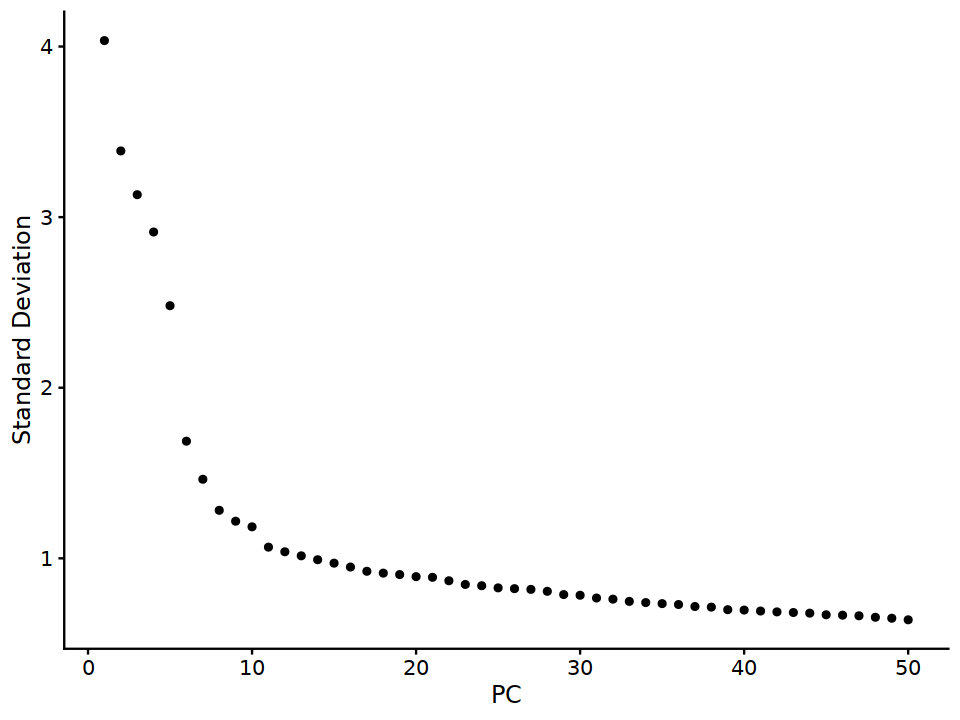

In [15]:
options(repr.plot.width = 8, repr.plot.height = 6)
ElbowPlot(seurat_obj, n=50)

In [16]:
ProjectDim(seurat_obj, reduction = "pca")

PC_ 1 
Positive:  CD3E, IL32, LTB, ETS1, PCED1B-AS1, CD3D, CD69, IL7R, CD7, SKAP1 
	   CD247, RHOH, BCL2, AQP3, BACH2, ICOS, FAM13A, KLRB1, CD8B, IL2RB 
Negative:  LYZ, FCN1, S100A9, CST3, IFI30, TYROBP, S100A8, VCAN, CD14, APOBEC3A 
	   HLA-DRA, S100A12, PPBP, IL1B, CXCL8, PF4, GNG11, THBS1, TUBB1, CCL3 
PC_ 2 
Positive:  IFI27, IFIT1B, THEM5, TMCC2, SPTA1, HBZ, FHDC1, SLC25A21, GDF15, IGKV3-11 
	   LYPD2, IGHA1, IGHV3-23, IGLV3-21, BGLT3, KRT79, IGHGP, IGLV3-27, IGKV4-1, IGKV3-20 
Negative:  CD69, LTB, IL32, CD3E, CD7, ETS1, PCED1B-AS1, CD247, CCL5, SKAP1 
	   CD3D, RHOH, IL7R, BCL2, PPBP, GP9, GNG11, CTSW, CAVIN2, TUBB1 
PC_ 3 
Positive:  CD3D, IL32, IL7R, CD69, CD3E, BCL2, SKAP1, ICOS, CD247, BACH2 
	   CD7, ETS1, AQP3, FAM13A, PCED1B-AS1, IFI27, TSHZ2, KLRB1, CD8B, FOXP3 
Negative:  LILRA4, JCHAIN, NIBAN3, CLEC4C, MZB1, SERPINF1, RHEX, PTPRS, ITM2C, IGKC 
	   LINC01478, LINC01374, LINC00996, COBLL1, GZMB, RGS7, HLA-DRA, TCL1A, PTCRA, PTGDS 
PC_ 4 
Positive:  TYROBP, FCN1, IFI30, L

An object of class Seurat 
29327 features across 54831 samples within 1 assay 
Active assay: RNA (29327 features, 0 variable features)
 1 dimensional reduction calculated: pca

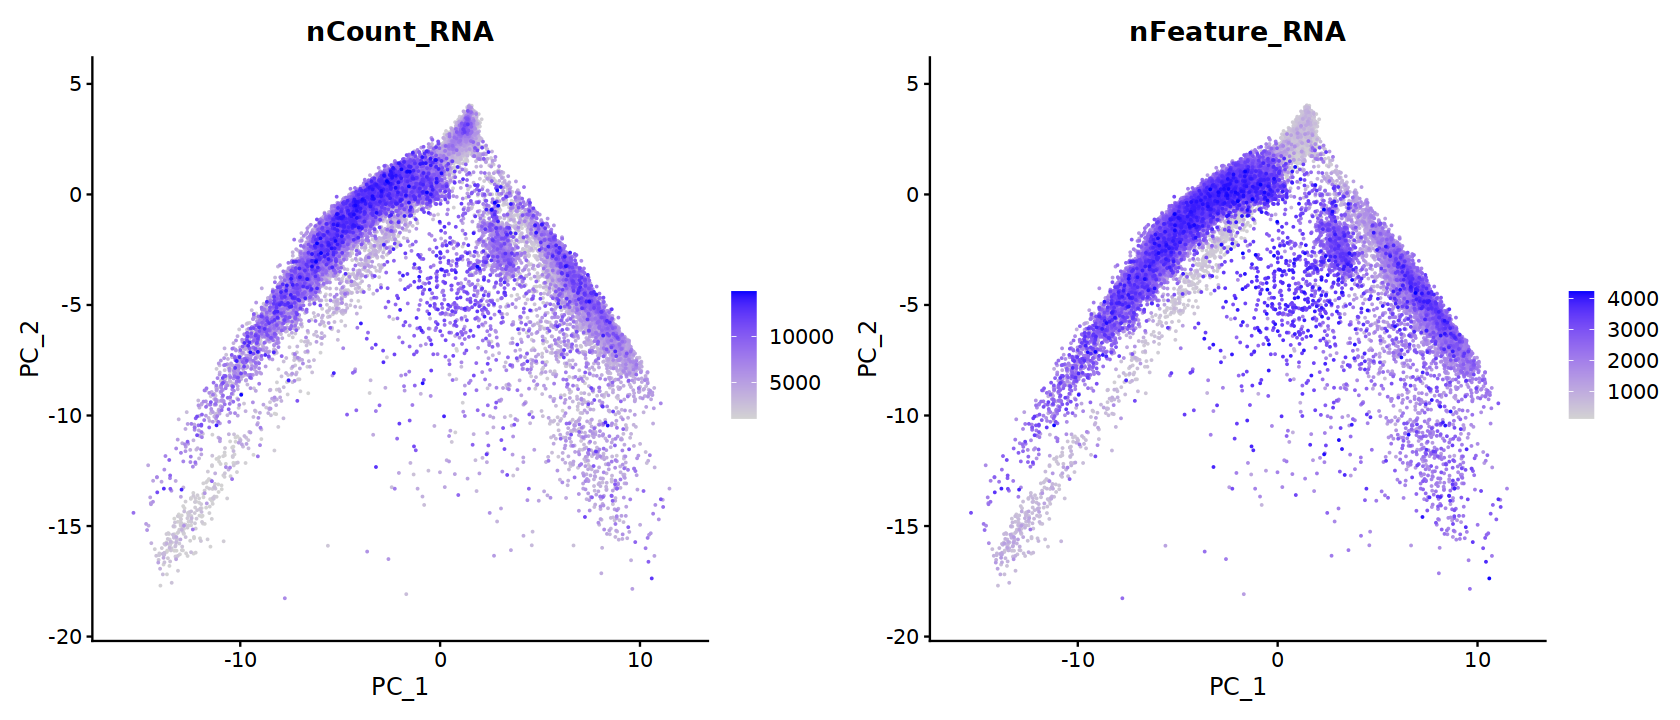

In [17]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("nCount_RNA","nFeature_RNA"), order=T)

## UMAP representation

In [18]:
seurat_obj <- RunUMAP(
  seurat_obj,
  dims = 1:20,
  reduction = "pca",
  reduction.name = "umap",
  reduction.key = "UMAP_"
)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:58:25 UMAP embedding parameters a = 0.9922 b = 1.112

10:58:25 Read 54831 rows and found 20 numeric columns

10:58:25 Using Annoy for neighbor search, n_neighbors = 30

10:58:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:58:34 Writing NN index file to temp file /scratch_tmp/33937378/RtmpbJa3H8/file51926b3d6c38

10:58:34 Searching Annoy index using 1 thread, search_k = 3000

10:58:55 Annoy recall = 84.56%

10:58:56 Commencing smooth kNN distance calibration using 1 thread
 with 

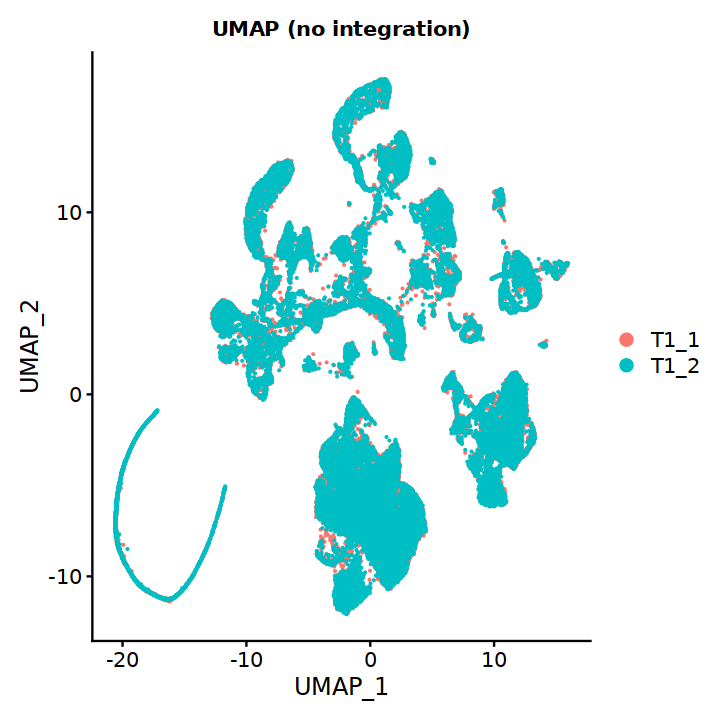

In [19]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  group.by = "sample_id",
  pt.size = 0.1
) + ggtitle('UMAP (no integration)') + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

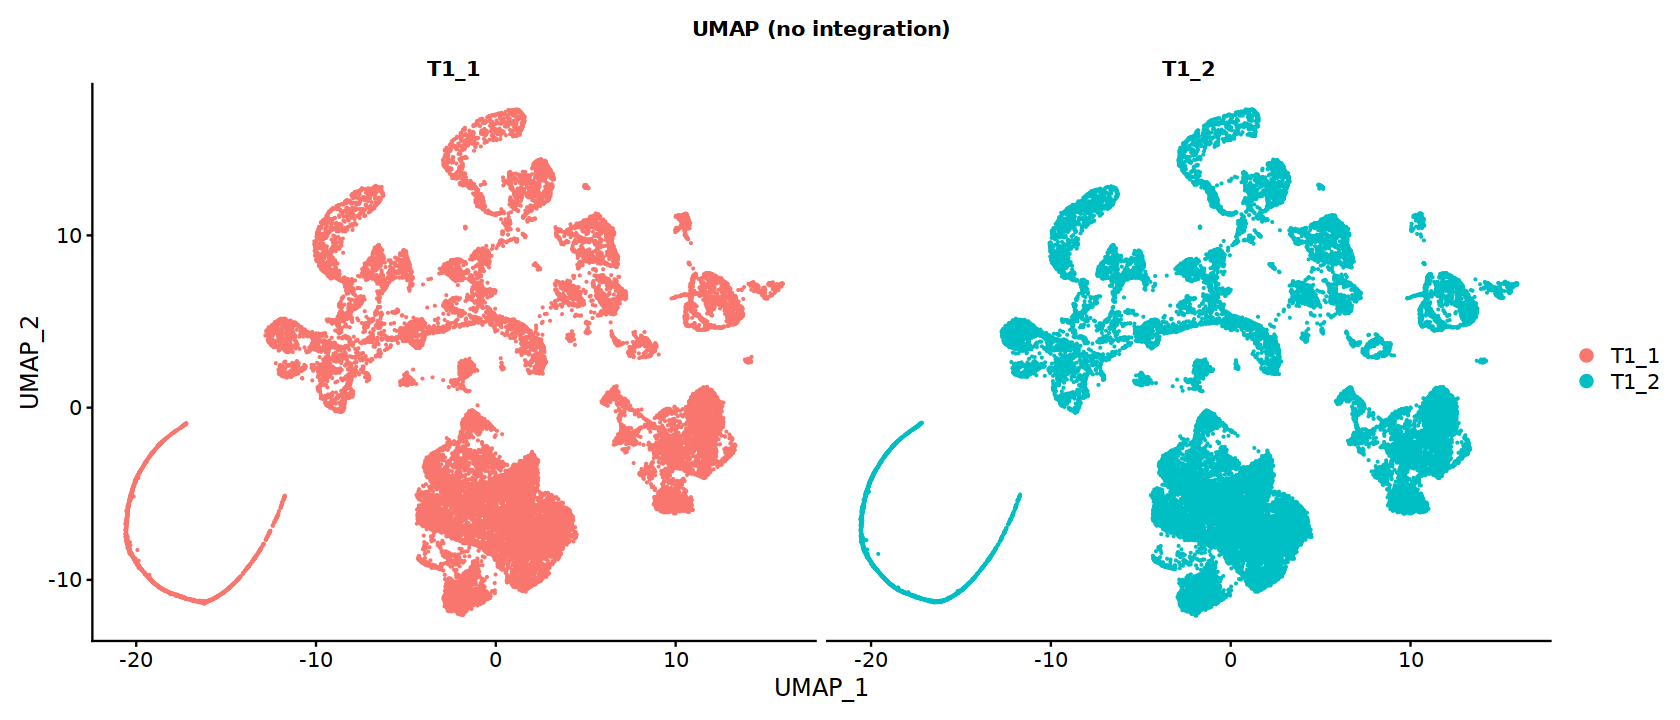

In [20]:
options(repr.plot.width = 14, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  group.by = "sample_id",
  split.by = "sample_id",
  pt.size = 0.1
) + ggtitle('UMAP (no integration)') + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## More quality checks on UMAPs

### Compute Cell-Cycle Scores

In [21]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
seurat_obj <- CellCycleScoring(seurat_obj, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

### Plot several features

In [22]:
cat_vars <-c("Phase")
con_vars <- c("nCount_RNA", "nFeature_RNA", "pct_mt", "percent.ribo", 
              "doublet_score", "PTPRC", "HBM")
vars <- c(cat_vars, con_vars)

In [23]:
# compute plots
list_plots <- lapply(vars, function(var){
  if (var %in% cat_vars) {
      p <- DimPlot(seurat_obj, reduction = "umap", group.by=var)
  } else {
      p <- FeaturePlot(seurat_obj, reduction = "umap", feature=var, order = TRUE)
  }
  return(p)
})

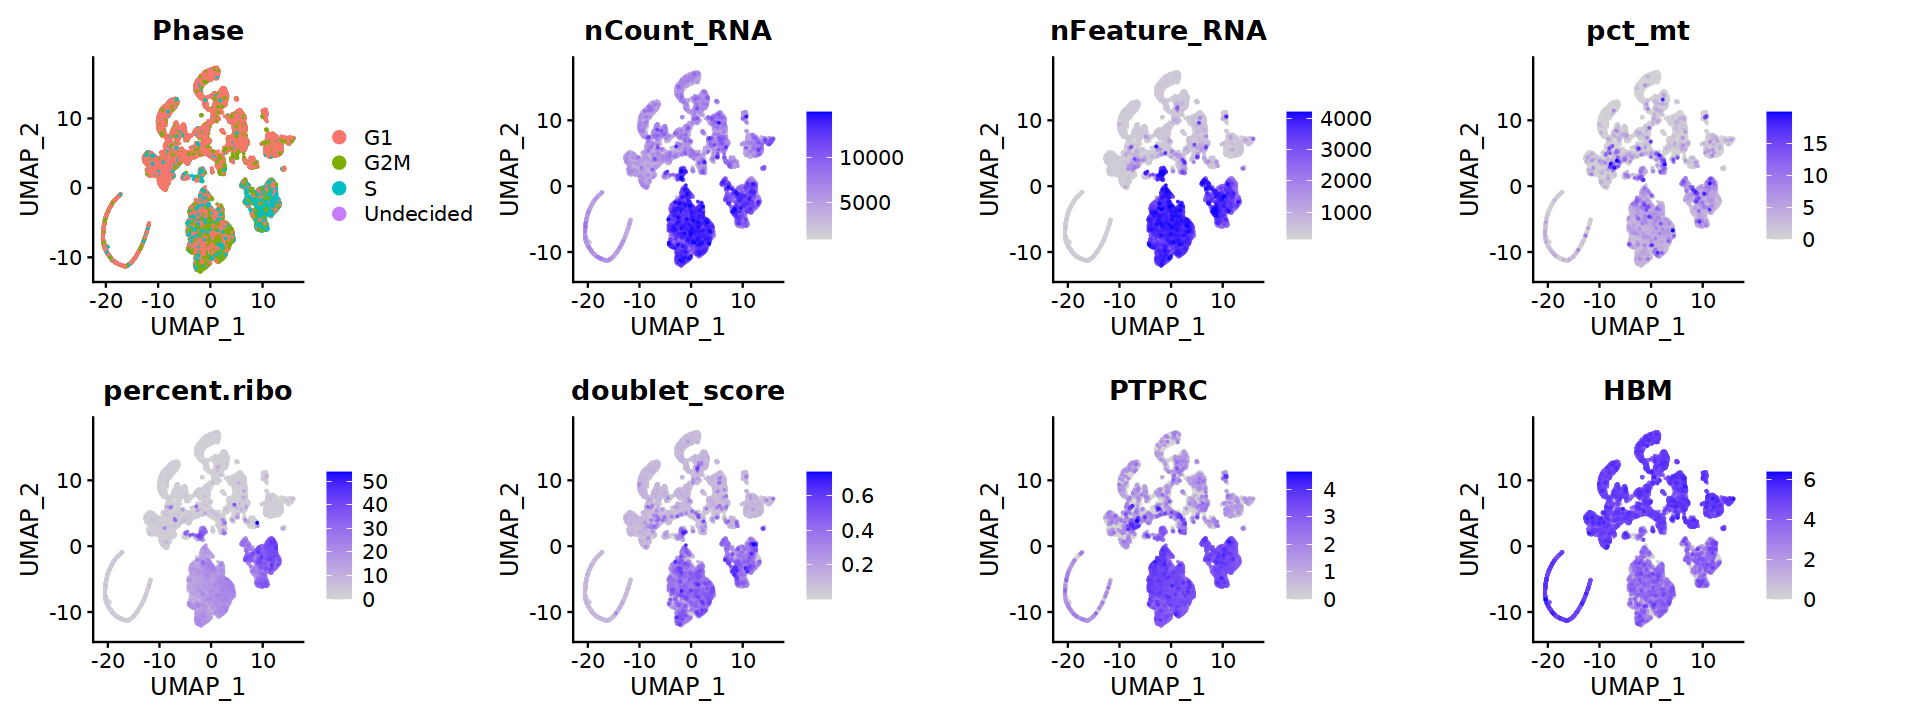

In [24]:
options(repr.plot.width = 16, repr.plot.height = 6, warn=-1,verbose = FALSE)
# show plots
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol = 4,
                   nrow = 2)
cp

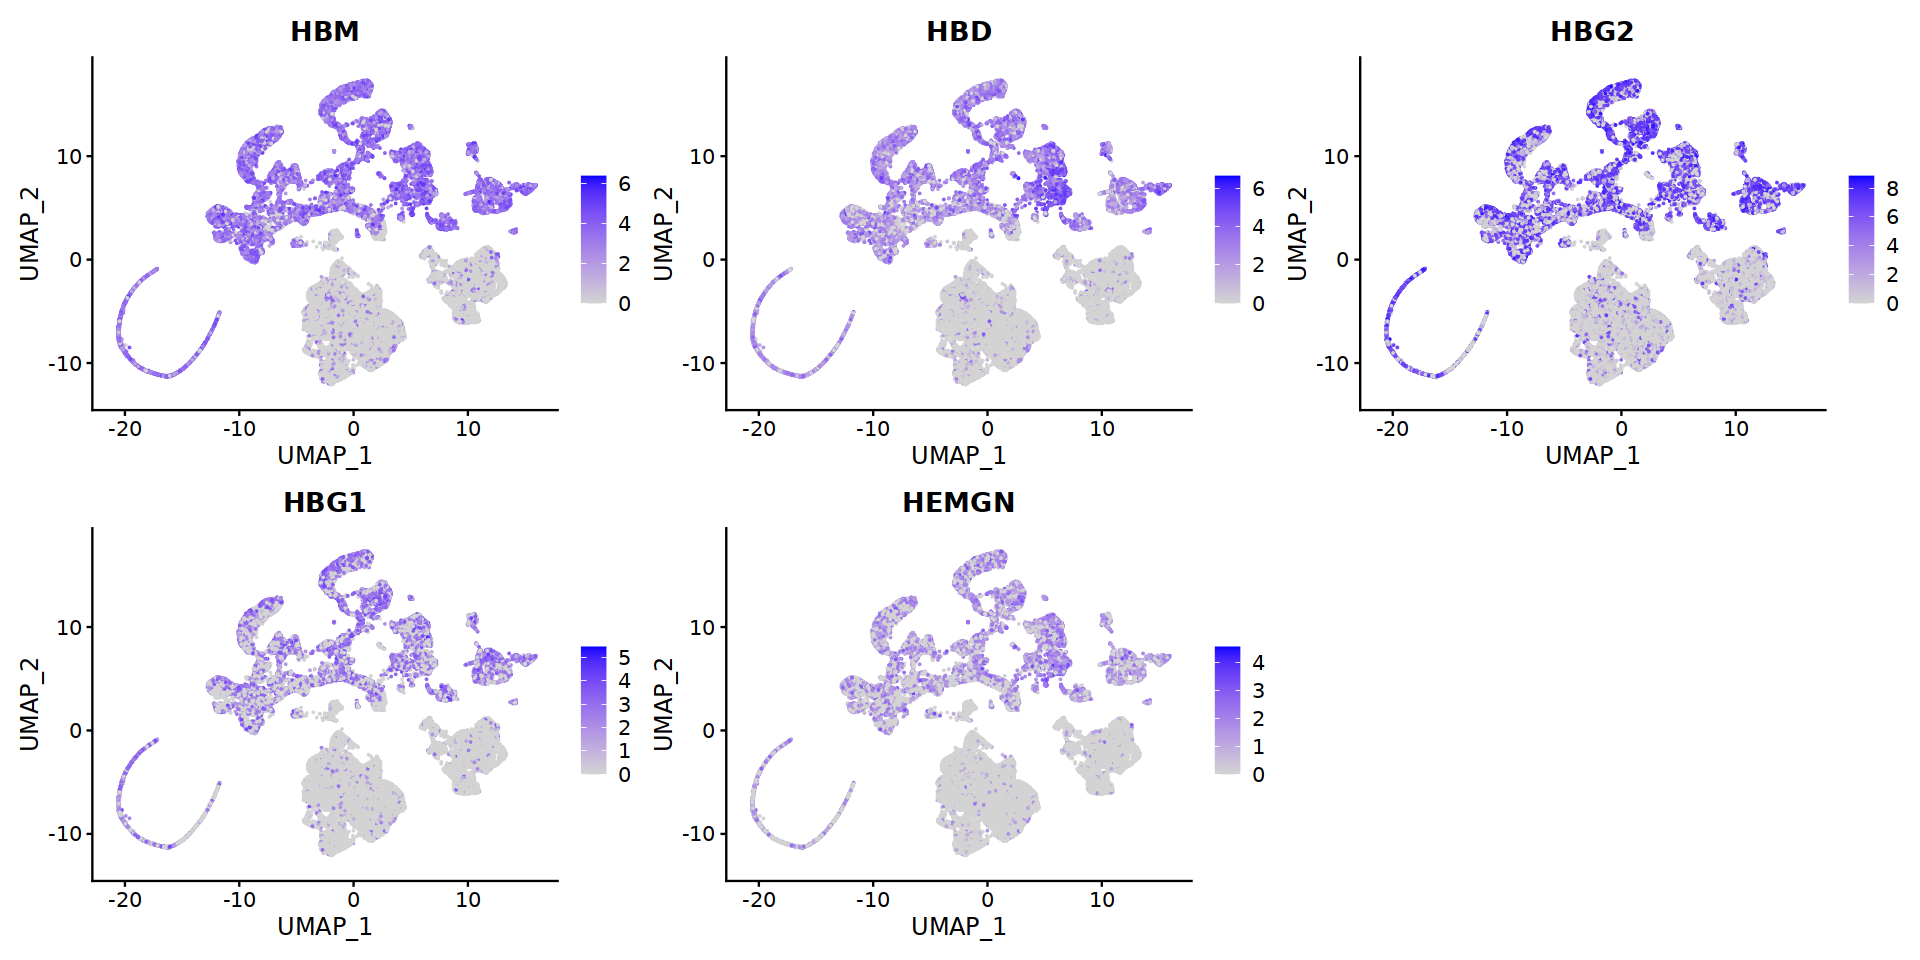

In [25]:
options(repr.plot.width = 16, repr.plot.height = 8, warn=-1,verbose = FALSE)
hemo_genes = c("HBM", "HBD", "HBG2","HBG1", "HEMGN")

FeaturePlot(seurat_obj, reduction = "umap", feature=hemo_genes, order = FALSE, ncol=3)

Erythrocytes need to be removed

# Save

In [26]:
saveRDS(seurat_obj, here::here(glue::glue("{clust}/{robj_dir}/dimred_combined_object_{timepoint}.rds")))

# Session Info

In [27]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scran_1.22.1                scater_1.22.0              
 [3] scuttle_1.4.0               SingleCellExperiment_1.16.0
 [5] SummarizedExperiment_1.24.0 Biobase_2.54.0             
 [7] GenomicRanges_1.46.1        GenomeInfoDb_1.30.1        
 [9] IRanges_